Name: Laura-Jane Beardsley

# Decision Tree Classifier 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Import the reduced data set obtained after feature importance was performed.

Drop the unnecessary index column 'Unamed: 0'.

In [2]:
df = pd.read_csv("No_Errors_Reduced.csv", header=0)
pd.set_option('display.max_columns', None)
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,PRF Δθ<sub>SQ</sub>(KIC) [arcsec],Number of Planets,Planet-Star Radius Ratio,Planetary Radius [Earth radii],PRF Δθ<sub>SQ</sub>(OOT) [arcsec],Maximum Multiple Event Statistic,FW Offset Significance [percent],Planet-Star Distance over Star Radius,Transit Depth [ppm],Transit Signal-to-Noise,Inclination [deg],Equilibrium Temperature [K],Impact Parameter,Number of Transits,Stellar Metallicity [dex],FW Source Δα(OOT) [sec],Transit Duration [hrs],FW Source Δδ(OOT) [arcsec],Maximum Single Event Statistic,Fitted Stellar Density [g/cm**3],Orbit Semi-Major Axis [AU],Orbital Period [days],Insolation Flux [Earth flux],Exoplanet Archive Disposition
0,0.320,2,0.022344,2.26,0.200,28.470820,0.002,24.810,615.8,35.8,89.66,793.0,0.146,142.0,0.14,0.430,2.95750,0.940,5.135849,3.20796,0.0853,9.488036,93.59,CONFIRMED
1,0.500,2,0.027954,2.83,0.390,20.109507,0.003,77.900,874.8,25.8,89.57,443.0,0.586,25.0,0.14,-0.630,4.50700,1.230,7.027669,3.02368,0.2734,54.418383,9.11,CONFIRMED
2,0.276,1,0.387394,33.46,0.289,541.895100,0.000,3.278,8079.2,505.6,67.09,1395.0,1.276,621.0,-0.52,-0.111,2.40641,0.002,39.066550,0.22080,0.0267,1.736952,891.96,FALSE POSITIVE
3,0.070,1,0.024064,2.75,0.100,33.191900,0.733,8.750,603.3,40.9,85.41,1406.0,0.701,515.0,0.07,-0.010,1.65450,0.230,4.749945,1.98635,0.0374,2.525592,926.16,CONFIRMED
4,8.948,1,0.183387,39.21,8.930,46.153080,0.000,2.400,233.7,47.7,60.92,1342.0,1.169,185.0,0.00,-13.450,5.02200,24.090,10.964684,0.00485,0.0820,7.361790,767.22,FALSE POSITIVE


Apply Standard Scaler to the dataset. Although it is not necessary for Decision Tree models this was done to remain consistent with other models tried. 

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [4]:
scaler.fit(df.drop('Exoplanet Archive Disposition',axis=1))

C:\Users\lb3558\AppData\Local\Continuum\anaconda2\envs\machinelearning\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
scaled_features = scaler.transform(df.drop('Exoplanet Archive Disposition',axis=1))
scaled_features

C:\Users\lb3558\AppData\Local\Continuum\anaconda2\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.512749  ,  0.57466542, -0.08220901, ..., -0.30031214,
        -0.31089283, -0.09112746],
       [-0.45606046,  0.57466542, -0.0800365 , ...,  0.47855444,
         0.19794517, -0.0931332 ],
       [-0.5266062 , -0.48246769,  0.05915894, ..., -0.54295745,
        -0.39867416, -0.07217246],
       ...,
       [ 0.30891988, -0.48246769,  0.02439842, ..., -0.60051324,
        -0.41236901,  0.01350268],
       [ 1.01154282, -0.48246769, -0.08720461, ..., -0.5885052 ,
        -0.41062832,  0.04229904],
       [ 0.48874852, -0.48246769, -0.08773438, ..., -0.40258755,
        -0.36335043, -0.07892804]])

In [6]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PRF Δθ<sub>SQ</sub>(KIC) [arcsec],Number of Planets,Planet-Star Radius Ratio,Planetary Radius [Earth radii],PRF Δθ<sub>SQ</sub>(OOT) [arcsec],Maximum Multiple Event Statistic,FW Offset Significance [percent],Planet-Star Distance over Star Radius,Transit Depth [ppm],Transit Signal-to-Noise,Inclination [deg],Equilibrium Temperature [K],Impact Parameter,Number of Transits,Stellar Metallicity [dex],FW Source Δα(OOT) [sec],Transit Duration [hrs],FW Source Δδ(OOT) [arcsec],Maximum Single Event Statistic,Fitted Stellar Density [g/cm**3],Orbit Semi-Major Axis [AU],Orbital Period [days],Insolation Flux [Earth flux]
0,-0.512749,0.574665,-0.082209,-0.029689,-0.552872,-0.251865,-0.504768,-0.135335,-0.308900,-0.313184,0.520745,-0.450817,-0.217554,-0.479365,0.929629,0.048426,-0.380230,0.078659,-0.224601,-0.008000,-0.300312,-0.310893,-0.091127
1,-0.456060,0.574665,-0.080036,-0.029535,-0.493124,-0.254227,-0.500411,0.502853,-0.305029,-0.325034,0.515233,-0.897733,-0.049885,-0.686469,0.929629,-0.019383,-0.157404,0.095238,-0.222009,-0.015344,0.478554,0.197945,-0.093133
2,-0.526606,-0.482468,0.059159,-0.021243,-0.524885,-0.106805,-0.513481,-0.394169,-0.197334,0.243540,-0.861401,0.317877,0.213050,0.368523,-1.370972,0.013818,-0.459479,0.025032,-0.178113,-0.127042,-0.542957,-0.398674,-0.072172
3,-0.591483,-0.482468,-0.081543,-0.029556,-0.584318,-0.250531,2.679901,-0.328391,-0.309087,-0.307140,0.260482,0.331923,-0.006062,0.180890,0.685626,0.020279,-0.567608,0.038067,-0.225129,-0.056683,-0.498652,-0.389743,-0.071360
4,2.204522,-0.482468,-0.019844,-0.019687,2.192392,-0.246869,-0.513481,-0.404723,-0.314612,-0.299082,-1.239240,0.250202,0.172276,-0.403250,0.441623,-0.839492,-0.083345,1.402179,-0.216615,-0.135648,-0.313976,-0.334973,-0.075134


Rename the full dataset for training on the reduced set as X_train_r and the response as y_train_r.

In [7]:
X_train_r = df_feat
y_train_r = df['Exoplanet Archive Disposition']

In [8]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

We first create a baseline model using the default parameters to compare how well our future/tuned models perform. We will use two different scoring types 'accuracy' and 'roc_auc'.

In [11]:
from sklearn.model_selection import cross_validate
dt_clf = DecisionTreeClassifier()
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(dt_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [12]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 95.0188 (+/- 1.08)
Train Accuracy: 100.00 (+/- 0.00)


In [13]:
from sklearn.model_selection import cross_validate
dt_clf = DecisionTreeClassifier()
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(dt_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [14]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 94.8433 (+/- 1.17)
Train Accuracy: 100.00 (+/- 0.00)


Run a broad grid search to search for the best parameters of Decision Tree model and use only 100 for n_splits.

In [19]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters = [{'criterion': ('gini', 'entropy'),
               'max_depth' : [2,4,6,8,10,15],
              'min_samples_split': [2,3,4,6,8,10,15],
              'min_samples_leaf': [1,2,5],
              'max_features': [None, 'auto', 'sqrt', 'log2'],
               'max_leaf_nodes' : [None, 2,5,10]
              }]
dt_clf1 = DecisionTreeClassifier()
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
grid1 = GridSearchCV(dt_clf1, parameters, cv=ss, n_jobs=-1, verbose=3)
grid1.fit(X_train_r, y_train_r)

Fitting 100 folds for each of 4032 candidates, totalling 403200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 915 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 1811 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 2963 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 4371 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 6035 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 7955 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 10131 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12563 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 15251 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 18195 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 21395 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 24851 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 28563 tasks

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=3, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'criterion': ('gini', 'entropy'), 'max_depth': [2, 4, 6, 8, 10, 15], 'min_samples_split': [2, 3, 4, 6, 8, 10, 15], 'min_samples_leaf': [1, 2, 5], 'max_features': [None, 'auto', 'sqrt', 'log2'], 'max_leaf_nodes': [None, 2, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [18]:
grid1.best_score_

0.956602809706258

In [19]:
grid1.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 8}

Run a second finer grid search to verify the best hyperparameters found in the first one.

In [31]:
parameters = [{'max_depth' : [9,10,11,12],
              'min_samples_split': [7,8,9],
              'min_samples_leaf': [4,5,6,7]
               }]
dt_clf2 = DecisionTreeClassifier()
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
grid2 = GridSearchCV(dt_clf2, parameters, cv=ss, n_jobs=-1, verbose=3)
grid2.fit(X_train_r, y_train_r)

Fitting 100 folds for each of 48 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 926 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 1502 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 2206 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 3038 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 3998 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=100, random_state=3, test_size=0.3,
            train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [9, 10, 11, 12], 'min_samples_split': [7, 8, 9], 'min_samples_leaf': [4, 5, 6, 7]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [32]:
print(grid2.best_score_)
print(grid2.best_params_)

0.9542145593869732
{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 8}


We returned the same hyperparameters in both grid searches so we are now moving on to a StratifiedShuffleSplit on them. We will use n_splits of 1000 and withhold 30% of the data for a test set used in cross validation.

In [21]:
from sklearn.model_selection import cross_validate
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8)
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(dt_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [22]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 95.7030 (+/- 1.07)
Train Accuracy: 98.37 (+/- 0.31)


In [43]:
from sklearn.model_selection import cross_validate
dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8)
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(dt_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [44]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 97.2624 (+/- 1.01)
Train Accuracy: 99.88 (+/- 0.07)


Both validation accuracy scores for the two different scoring types using our tuned hyperparameters outperformed our baseline models. 

# AdaBoost

Now we will try AdaBoost to see if we can improve and build a baseline (default) model again.

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate

In [16]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [17]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 94.9872 (+/- 1.10)
Train Accuracy: 100.00 (+/- 0.00)


In [18]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(),random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [19]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 94.8036 (+/- 1.21)
Train Accuracy: 100.00 (+/- 0.00)


Now that we have our baseline scores we will add the best hyperparameters from our earlier Decision Tree and fine tune other ones used for AdaBoost. Use a series of graphs plotting a range a n_estimators and learning rates vs accuracy scores to help with this process and find AdaBoost's best parameters. 

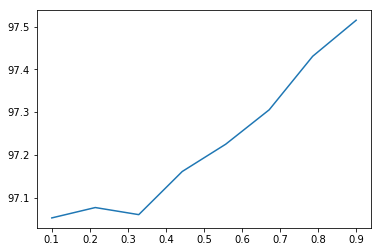

In [11]:
splits = []
for i in np.linspace(.1,.9,8):
    ss = StratifiedShuffleSplit(n_splits=50, test_size=0.3, random_state=3)
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=50, algorithm="SAMME.R", learning_rate=i, random_state=3)
    scores= cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(np.linspace(.1,.9,8), splits)
plt.show()

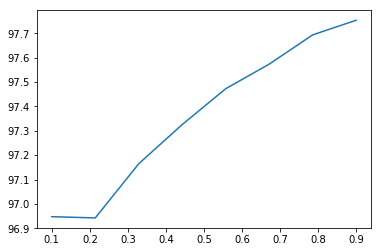

In [12]:
splits = []
for i in np.linspace(.1,.9,8):
    
    ss = StratifiedShuffleSplit(n_splits=50, test_size=0.3, random_state=3)
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=200, algorithm="SAMME.R", learning_rate=i, random_state=3)
    scores= cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(np.linspace(.1,.9,8), splits)
plt.show()

We can see that a higher accuracy score for both a smaller and larger number of n_estimators occurs with higher learning rates. We will choose a learning rate of 0.8, it is still relatively high but not as high as 0.9 to reduce the risk of training too fast and returning suboptimal results. 

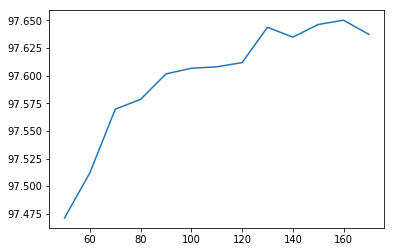

In [10]:
splits = []
for i in range(50,180,10):
    ss = StratifiedShuffleSplit(n_splits=50, test_size=0.3, random_state=3)
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=i, algorithm="SAMME.R", learning_rate=.8, random_state=3)
    scores= cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)
    splits.append(scores['test_score'].mean()*100)
plt.plot(range(50,180,10), splits)
plt.show() 

Based on the above graph, we will choose 160 for n_estimators and 0.8 for the learning rate to use for our AdaBoost best parameters. 

In [21]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=160, algorithm="SAMME.R", learning_rate=0.8, random_state=3)
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [22]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 97.6900 (+/- 0.70)
Train Accuracy: 100.00 (+/- 0.00)


In [24]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=160, algorithm="SAMME.R", learning_rate=0.8, random_state=3)
ss = StratifiedShuffleSplit(n_splits=1000, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [25]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 99.6192 (+/- 0.21)
Train Accuracy: 100.00 (+/- 0.00)


We can see that our tuned model outperforms one using only the defaults.

The rest of the code below shows other combinations of n_estimators and learning rates tried but none of them are better than the above model and help confirm the information from the graphs in selecting our best hyperparameters. 

In [59]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=175, algorithm="SAMME.R", learning_rate=0.3, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [60]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 97.0172 (+/- 0.88)
Train Accuracy: 100.00 (+/- 0.00)


In [61]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=175, algorithm="SAMME.R", learning_rate=0.3, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [62]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 99.4041 (+/- 0.33)
Train Accuracy: 100.00 (+/- 0.00)


In [45]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=100, algorithm="SAMME.R", learning_rate=0.7, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [46]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 97.5217 (+/- 0.71)
Train Accuracy: 100.00 (+/- 0.00)


In [51]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=100, algorithm="SAMME.R", learning_rate=0.7, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [52]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 99.5577 (+/- 0.26)
Train Accuracy: 100.00 (+/- 0.00)


In [49]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=200, algorithm="SAMME.R", learning_rate=0.4, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [50]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 97.2395 (+/- 0.78)
Train Accuracy: 100.00 (+/- 0.00)


In [53]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=200, algorithm="SAMME.R", learning_rate=0.4, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [54]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 99.4721 (+/- 0.26)
Train Accuracy: 100.00 (+/- 0.00)


In [41]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=150, algorithm="SAMME.R", learning_rate=0.5, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='accuracy', n_jobs=-1)

In [42]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 97.2797 (+/- 0.84)
Train Accuracy: 100.00 (+/- 0.00)


In [39]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=5,min_samples_split=8),
    n_estimators=150, algorithm="SAMME.R", learning_rate=0.5, random_state=3)
ss = StratifiedShuffleSplit(n_splits=100, test_size=0.3, random_state=3)
scores=cross_validate(ada_clf, X_train_r, y_train_r, cv=ss, return_train_score=True, scoring='roc_auc', n_jobs=-1)

In [40]:
print("Validation Accuracy: %0.4f (+/- %0.2f)" % (scores['test_score'].mean()*100, scores['test_score'].std()*2*100))
print("Train Accuracy: %0.2f (+/- %0.2f)" % (scores['train_score'].mean()*100, scores['train_score'].std()*2*100))

Validation Accuracy: 99.4834 (+/- 0.28)
Train Accuracy: 100.00 (+/- 0.00)
